In [1]:
from models import *
from data_prep import *
from divide import *

In [2]:
df = get_fully_featured_df(categorical = True)

train, val, test = train_val_test(df, False, 'datetime')

not_features = ['datetime', 'kWh']
features = [col for col in df.columns.tolist() if col not in not_features]

In [14]:
# study, best_model, cv_score, test_score = optimize_model('LGBM', train, features, trials=50)

Best parameters: {'n_estimators': 132, 'learning_rate': 0.1301801912057029, 'num_leaves': 790, 'max_depth': 25, 'min_data_in_leaf': 42, 'bagging_freq': 6, 'lambda_l1': 6.551012264884769, 'lambda_l2': 6.756342452407841, 'reg_sqrt': False, 'max_bin': 694}
Nested CV RMSE: 50.643643377129706
Test set score: 0


In [3]:
params = {'n_estimators': 132, 'learning_rate': 0.1301801912057029, 'num_leaves': 790, 'max_depth': 25, 'min_data_in_leaf': 42, 'bagging_freq': 6, 'lambda_l1': 6.551012264884769, 'lambda_l2': 6.756342452407841, 'reg_sqrt': False, 'max_bin': 694, 'verbose': -1}

In [4]:
X = train[features]
y = train['kWh']

lgbm_model = lgb.LGBMRegressor(**params)
lgbm_model.fit(X, y)

LGBMRegressor(bagging_freq=6, lambda_l1=6.551012264884769,
              lambda_l2=6.756342452407841, learning_rate=0.1301801912057029,
              max_bin=694, max_depth=25, min_data_in_leaf=42, n_estimators=132,
              num_leaves=790, reg_sqrt=False, verbose=-1)

In [5]:
valid_preds = np.clip(lgbm_model.predict(val[features]), 0, None)
test_preds = np.clip(lgbm_model.predict(test[features]), 0, None)
print(f"Validation: {mape(val['kWh'], valid_preds)} \n"
      f"Test: {mape(test['kWh'], test_preds)}")

Validation: 1.8908597823761057 
Test: 2.3775931293105366


Average error on validation: 1.4398649133180303
Average error on test: 1.3841851977843191


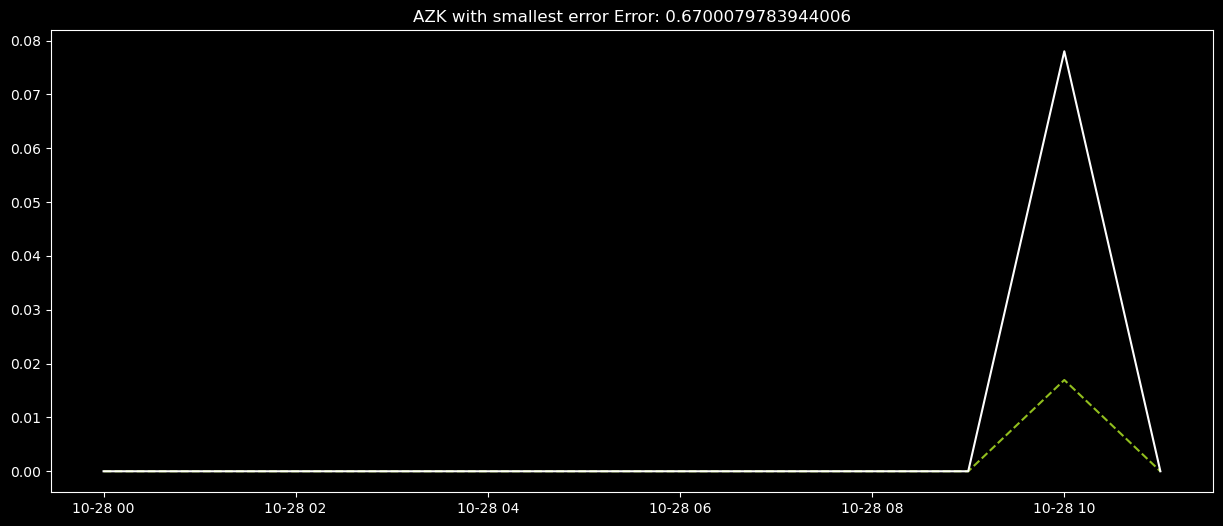

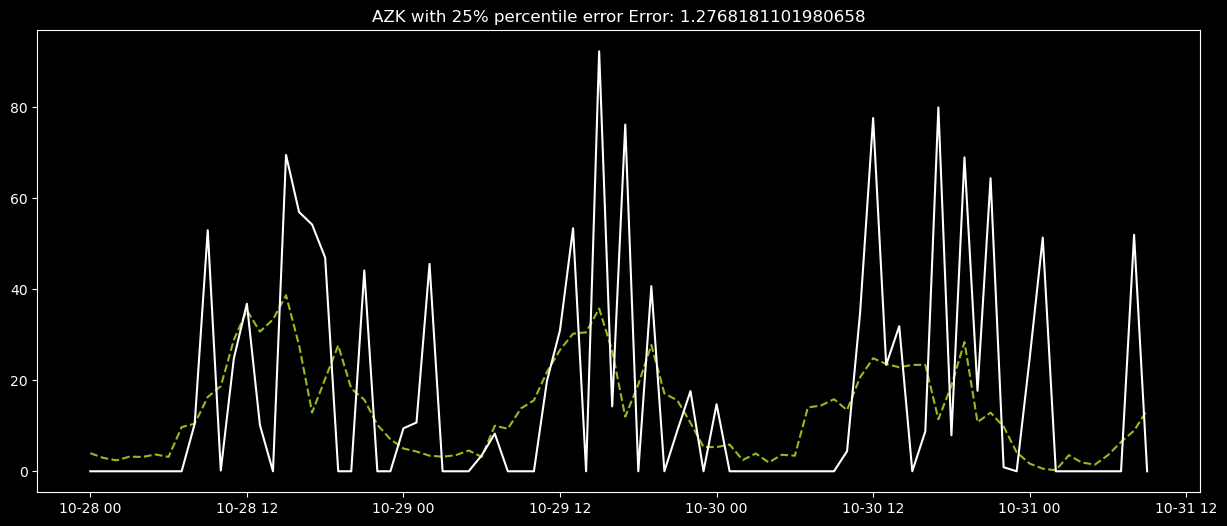

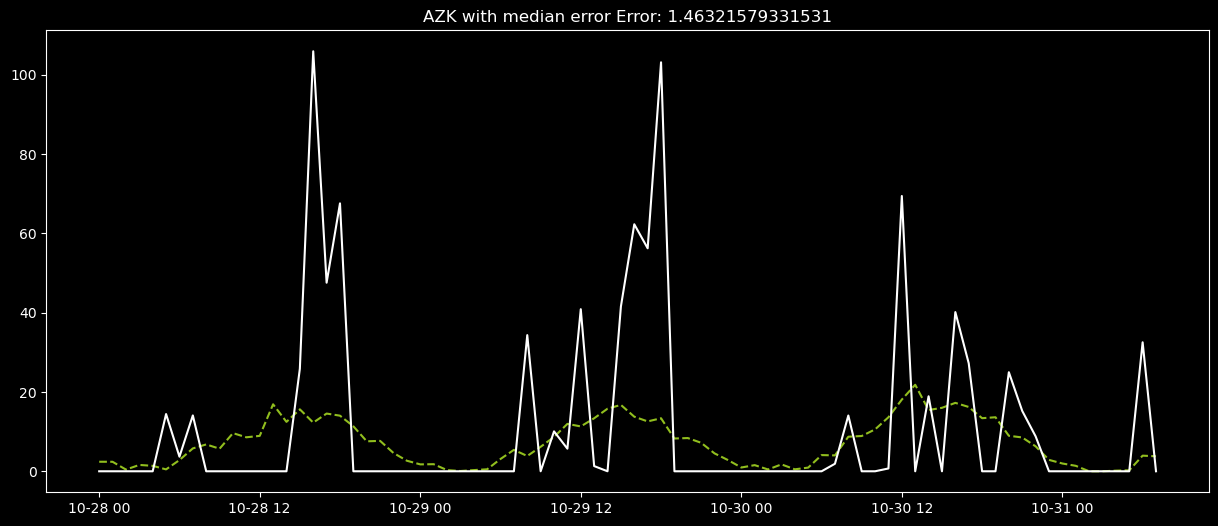

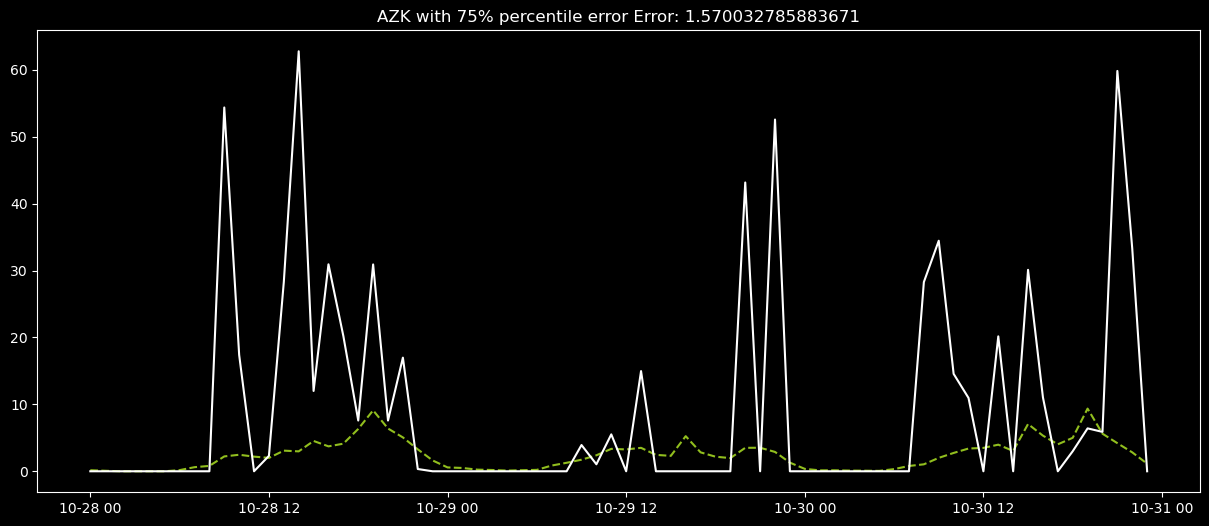

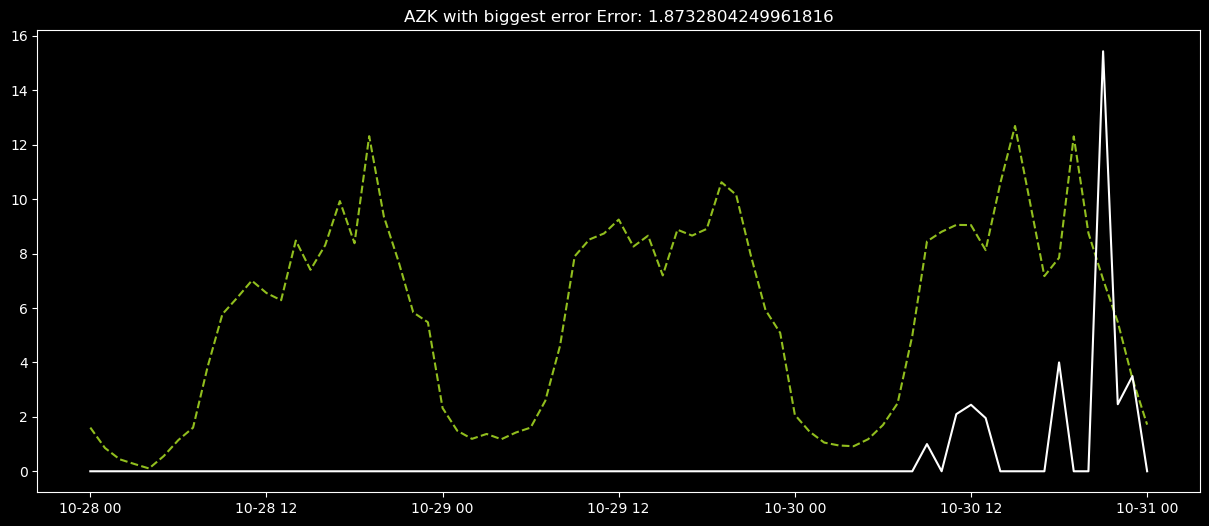

In [7]:
vizualize_percentiles(df, test, val, lgbm_model, features)

In [8]:
df = get_fully_featured_df(categorical = True)

train, val, test = train_val_test(df, True, 'datetime')

not_features = ['datetime', 'kWh']
features = [col for col in df.columns.tolist() if col not in not_features]

In [19]:
# study, best_model, cv_score, test_score = optimize_model('LGBM', train, features, trials=50)

Best parameters: {'n_estimators': 107, 'learning_rate': 0.12933630794531006, 'num_leaves': 926, 'max_depth': 27, 'min_data_in_leaf': 41, 'bagging_freq': 6, 'lambda_l1': 1.2010872521233402, 'lambda_l2': 7.840694618129978, 'reg_sqrt': False, 'max_bin': 6498}
Nested CV RMSE: 43.557670188204526
Test set score: 0


In [9]:
params = {'n_estimators': 107, 'learning_rate': 0.12933630794531006, 'num_leaves': 926, 'max_depth': 27, 'min_data_in_leaf': 41, 'bagging_freq': 6, 'lambda_l1': 1.2010872521233402, 'lambda_l2': 7.840694618129978, 'reg_sqrt': False, 'max_bin': 6498, 'verbose': -1}

In [10]:
X = train[features]
y = train['kWh']

lgbm_model = lgb.LGBMRegressor(**params)
lgbm_model.fit(X, y)

LGBMRegressor(bagging_freq=6, lambda_l1=1.2010872521233402,
              lambda_l2=7.840694618129978, learning_rate=0.12933630794531006,
              max_bin=6498, max_depth=27, min_data_in_leaf=41, n_estimators=107,
              num_leaves=926, reg_sqrt=False, verbose=-1)

In [11]:
valid_preds = np.clip(lgbm_model.predict(val[features]), 0, None)
test_preds = np.clip(lgbm_model.predict(test[features]), 0, None)
print(f"Validation: {smape(val['kWh'], valid_preds)} \n"
      f"Test: {smape(test['kWh'], test_preds)}")

Validation: 1.4413981785404613 
Test: 1.4603816943800685


Average error on validation: 1.4394735211363991
Average error on test: 1.4523492422966915


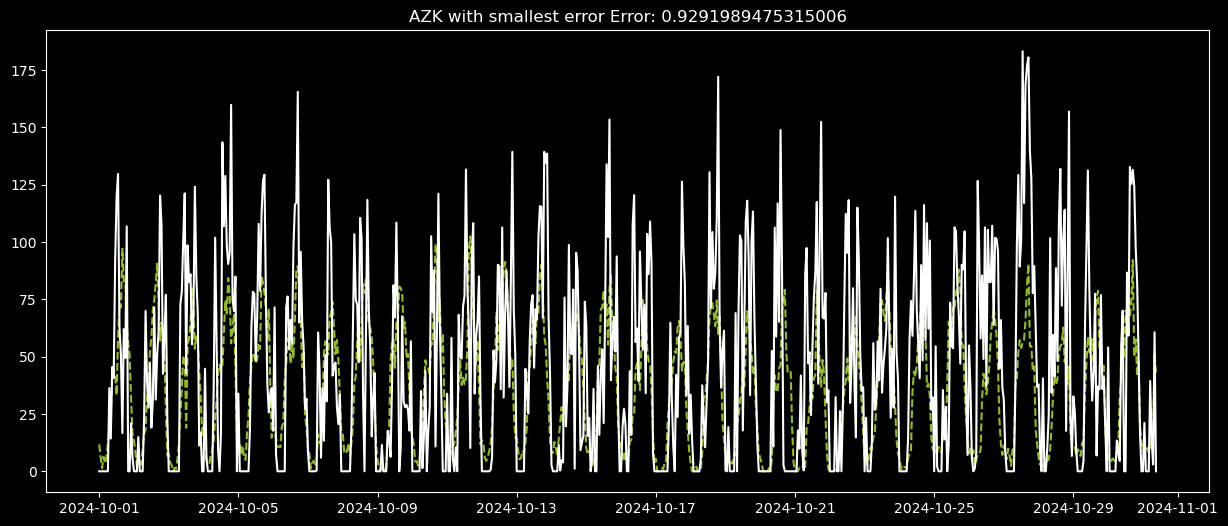

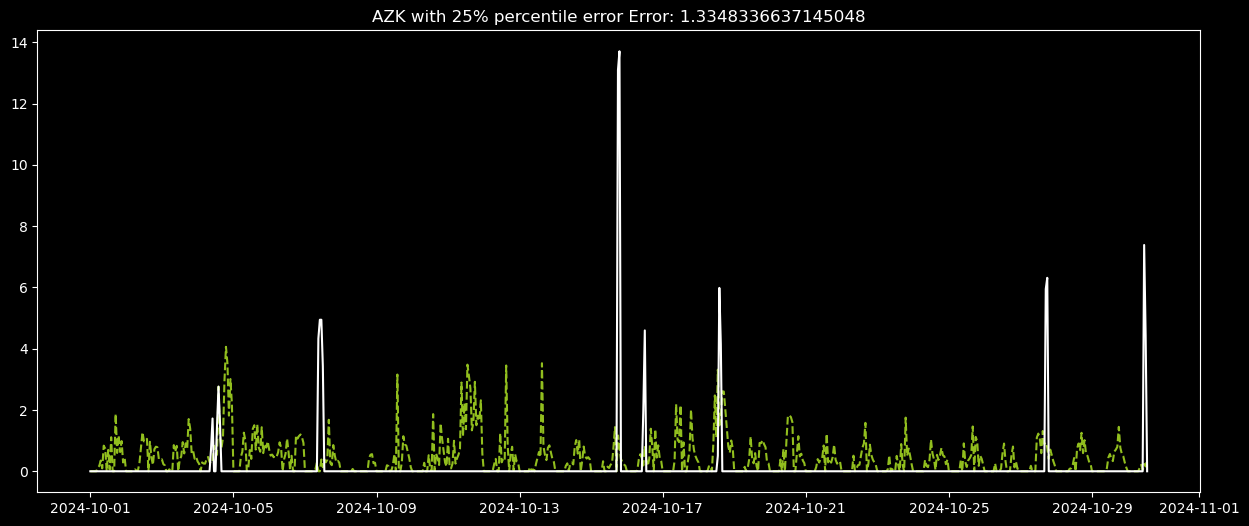

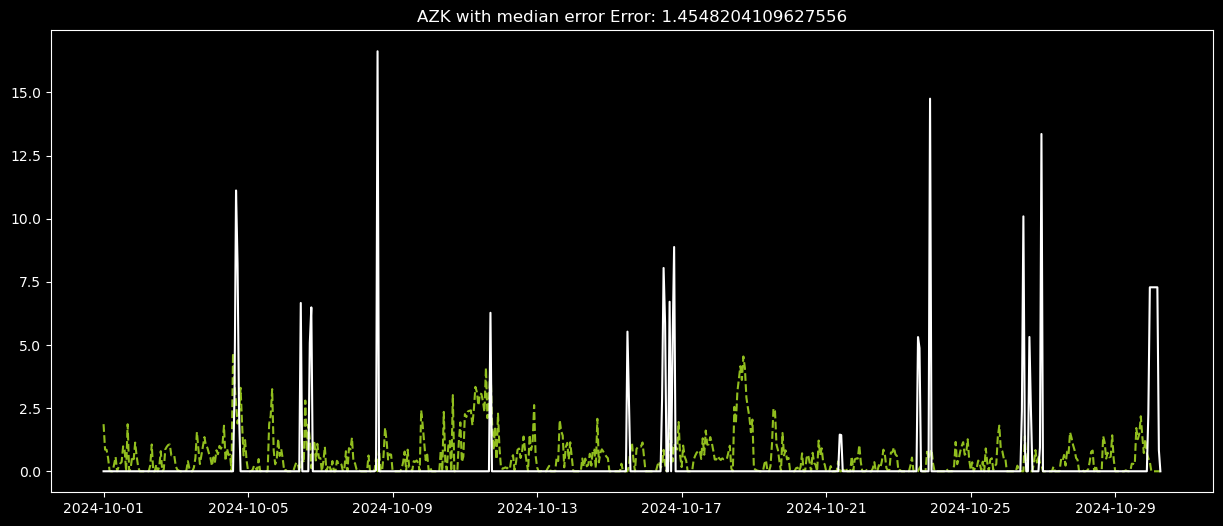

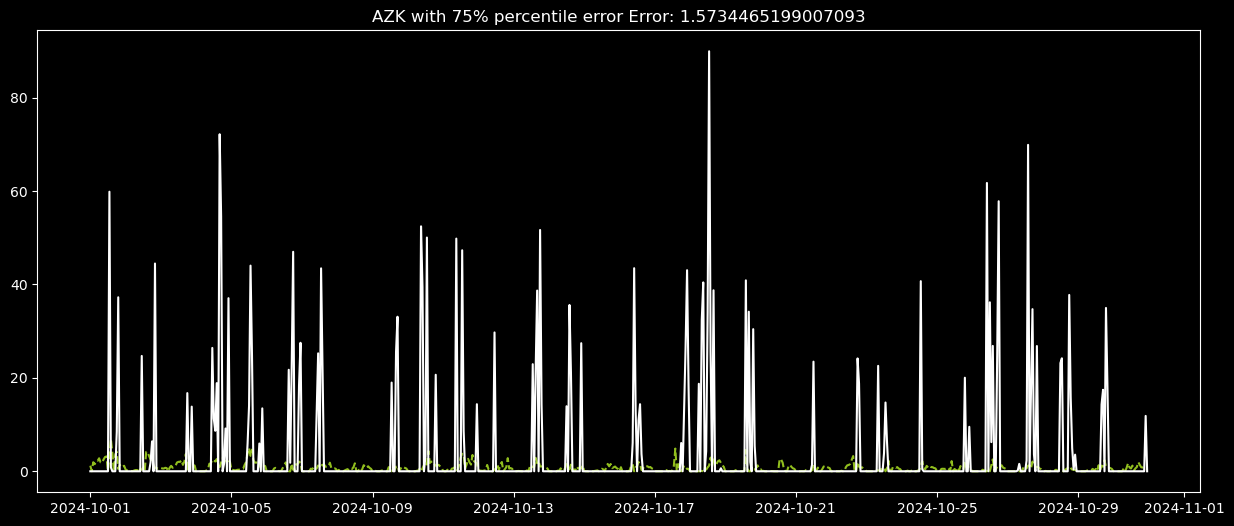

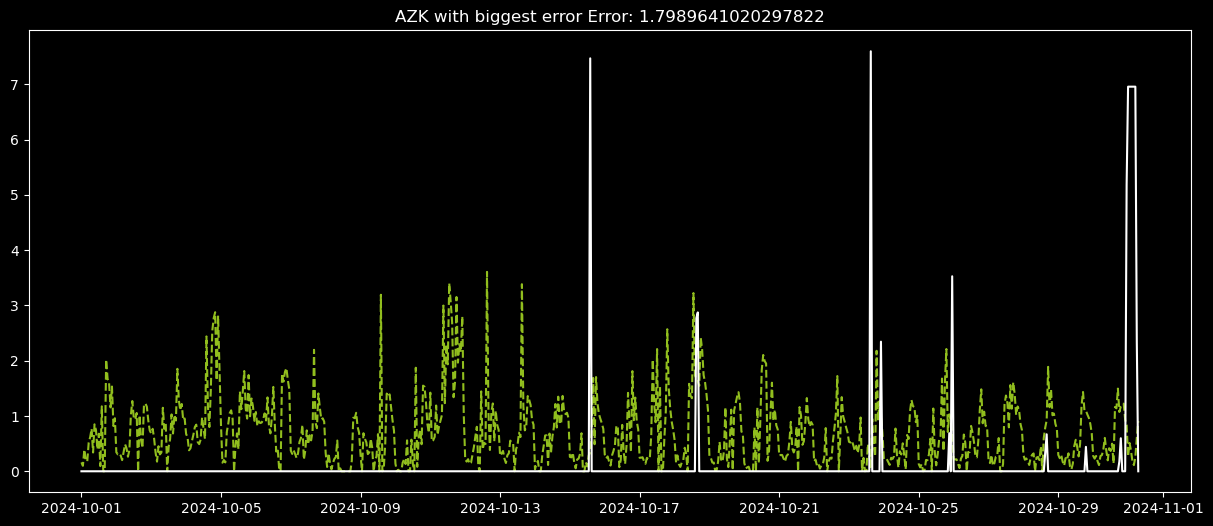

In [12]:
vizualize_percentiles(df, test, val, lgbm_model, features)

In [23]:
from datetime import datetime

# Get the current time
current_time = datetime.now()

# Print the current time
print("Current time:", current_time.strftime("%Y-%m-%d %H:%M:%S"))


Current time: 2024-12-19 08:36:45


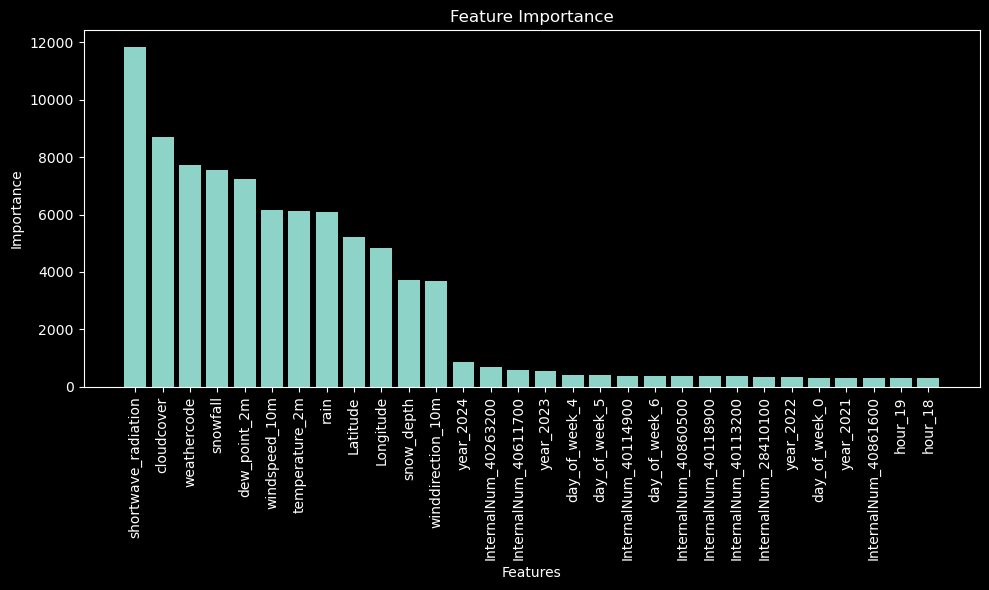

In [22]:
importance = lgbm_model.feature_importances_
feature_names = features
indices = np.argsort(importance)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(30), importance[indices[:30]], align='center')
plt.xticks(range(30), [feature_names[i] for i in indices[:30]], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()